#### **Chuẩn bị:** thư viện và một số công cụ

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

#### **Euler hiện:** $y_{k+1} = y_k + hf(x,y_k)$

In [83]:
def Euler_Forward(x_test, y0, h):
    res = []
    y = y0
    for i in range (len(x_test)):
        x = x_test[i]
        res.append(y)
        y = y + h * f(x,y)
    return res

#### *Phương pháp* **Euler hiện** giải ptvp cấp $k$

In [1]:
# INPUT: [x0,X], Y=[y^(n-1)(x_0) = y1,.....], n, h
def N_Euler_Forward(x_test, Y, degN, h):
    res = []
    Z = np.copy(Y)
    for i in range (len(x_test)):
        res.append(Z[0])
        for j in range(degN-1):
            Z[j] = Z[j] + h*Z[j+1]
        Z[degN-1] = Z[degN-1] + h * g(x_test[i],Z)
    return res

#### **Euler ẩn:** $y_{k+1} = y_k + hf(x+h, y_k+hf(x,y_k))$

In [84]:
def Euler_Backward(x_test, y0, h):
    res = []
    y = y0
    I = 0
    for i in range (len(x_test)):
        x = x_test[i]
        res.append(y)
        I = h * f(x + h, y + h*f(x, y))
        y = y + I
    return res

#### **Hình thang:** 
$y_{i+1} = y_i + \dfrac{h}{2}\times\left(F(x_i, y_i) + F(x_{i+1}, y_{i+1})\right)$

In [91]:
def Trapezoidal(x_test, y0, h):
    res = []
    y = y0
    I = 0
    for i in range (len(x_test)):
        x = x_test[i]
        res.append(y)
        I = (h/2) * (f(x, y) + f(x+h, y + h*f(x,y)))
        y = y + I
    return res

#### *Phương pháp* **Hình thang** giải ptvp cấp $k$

In [2]:
def N_Trapezoidal(x_test, Y, degN, h):
    res = []
    Z1 = np.zeros(degN, dtype=float)
    Z2 = np.zeros(degN, dtype=float)
    Z = np.copy(Y)
    for i in range(len(x_test)):
        res.append(Z[0])
        for j in range(degN-1):
            Z2[j] = Z[j] + h * Z[j + 1]
        Z2[degN - 1] = Z[degN - 1] + h * g(x_test[i], Z)
        for j in range(degN-1):
            Z1[j] = Z[j] + 0.5 * h * (Z[j + 1] + Z2[j + 1])
        Z1[degN-1] = Z[degN-1] + 0.5 * h * (g(x_test[i],Z) + g(x_test[i]+h, Z2))
        Z = Z1
    return res

#### ***INPUT:*** $y(x_0) = y_0, h, X: [x_0, X]$

In [5]:
x0 = 0                  # x_0
y0 = 1                  # y(x_0) = y_0
X = 1                   # [x0,X]
h = 1e-1;               # khoảng cách điểm chia: h = x_{i+1} - x_{i}
n = 2                   # Bậc của phương trình vi phân
answer_correct     = [] # Nghiệm đúng
res_Euler_Forward  = [] # Nghiệm thu từ Euler hiện
res_Euler_Backward = [] # Nghiệm thu từ Euler ẩn
res_Trapezoidal    = [] # Nghiệm thu được từ Hình thang 
Y = [2,1]               # các giá trị ban đầu
# các giá trị x
x_test = np.linspace(x0,X,(int)((X-x0)/h + 1))

In [6]:
## Áp dụng khi giải phương trình vi phân bậc nhất (y'= f(x,y))
def f(x,y):
    return x + y

## Áp dụng khi giải phương trình vi phân cấp k (y^(k) = g(x,y,y^(1),...,y^(k-1)))
def g(x,y):
    return -2*y[0] -2*y[1] 

## Viết hàm là nghiệm chính xác tại đây
def y_correct():
    y = []
    for i in range (len(x_test)):
        x = x_test[i]
        y.append(math.pow(math.e,-x)*(2*math.cos(x)+3*math.sin(x)))
    return y

answer_correct = y_correct()

#### *Cách 1* Euler hiện

In [7]:
## ptvp cấp 1
# res_Euler_Forward = Euler_Forward(x_test, y0, h)
## ptvp cấp n
res_Euler_Forward = N_Euler_Forward(x_test, Y, n, h)
print(" \n      x           y          forward        ss")

for i in range (len(x_test)):
    y = answer_correct[i]
    print("%-7.9f   %-7.9f  %-7.9f  %-7.9f \n"
     %(x_test[i],y,res_Euler_Forward[i],math.fabs(y-res_Euler_Forward[i])))

 
      x           y          forward        ss
0.000000000   2.000000000  2.000000000  0.000000000 

0.100000000   2.071633033  2.000000000  0.071633033 

0.200000000   2.092791367  2.000000000  0.092791367 

0.300000000   2.072241617  2.000000000  0.072241617 

0.400000000   2.017916059  2.000000000  0.017916059 

0.500000000   1.936920325  2.000000000  0.063079675 

0.600000000   1.835554657  2.000000000  0.164445343 

0.700000000   1.719345888  2.000000000  0.280654112 

0.800000000   1.593087616  2.000000000  0.406912384 

0.900000000   1.460886372  2.000000000  0.539113628 

1.000000000   1.326211848  2.000000000  0.673788152 



#### *Cách 2* Euler ẩn

In [ ]:
res_Euler_Backward = Euler_Backward(x_test, y0, h)
print(" \n   x              y         backward        ss")
for i in range (len(x_test)):
    y = answer_correct[i]
    print("%-7.9f   %-7.9f  %-7.9f  %-7.9f \n"
     %(x_test[i],y,res_Euler_Backward[i],math.fabs(y-res_Euler_Backward[i])))

#### *Cách 3:* Hình thang

In [8]:
## ptvp cấp 1
# res_Trapezoidal = Euler_Forward(x_test, y0, h)
## ptvp cấp n
res_Trapezoidal = N_Trapezoidal(x_test, Y, n, h)
print(" \n   x              y         trapzoidal       ss")
for i in range (len(x_test)):
    y = answer_correct[i]
    print("%-7.9f   %-7.9f  %-7.9f  %-7.9f \n"
     %(x_test[i],y,res_Trapezoidal[i],math.fabs(y-res_Trapezoidal[i])))

 
   x              y         trapzoidal       ss
0.000000000   2.000000000  2.000000000  0.000000000 

0.100000000   2.071633033  2.070000000  0.001633033 

0.200000000   2.092791367  2.089800000  0.002991367 

0.300000000   2.072241617  2.067994800  0.004246817 

0.400000000   2.017916059  2.012921507  0.004994552 

0.500000000   1.936920325  1.931927826  0.004992499 

0.600000000   1.835554657  1.831427945  0.004126712 

0.700000000   1.719345888  1.716964646  0.002381242 

0.800000000   1.593087616  1.593275330  0.000187715 

0.900000000   1.460886372  1.464360022  0.003473650 

1.000000000   1.326211848  1.333549729  0.007337881 



#### **Đồ thị**

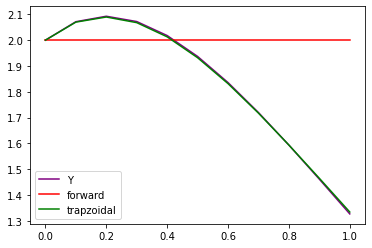

In [9]:
## vẽ đồ thị
plt.plot(x_test,answer_correct,'purple',label='Y')
plt.plot(x_test,res_Euler_Forward,'red', label = 'forward')
# plt.plot(x_test,res_Euler_Backward,'blue', label = 'backward')
plt.plot(x_test,res_Trapezoidal,'green', label = 'trapzoidal')
plt.legend()
plt.show()